In [2]:
import generate
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pyEDM

In [3]:
tau = 15
n = 10
beta = 0.2
gamma = 0.1


x0 = 0.5
dt = 0.1
t_max = 500


t, x = generate.mackey_glass(tau, n, beta, gamma, x0, dt, t_max)


tau_idx = int(tau / dt)
tau2_idx = int(2 * tau / dt)


x_t = x[tau2_idx:]
x_t_tau = x[tau_idx:-tau_idx]
x_t_2tau = x[:-tau2_idx]


layout = go.Layout(
    title="Mackey-Glass Time Series",
    scene=dict(
        xaxis=dict(title="x(t)"),
        yaxis=dict(title="x(t-tau)"),
        zaxis=dict(title="x(t-2tau)"),
    ),
    width=600,
    height=600,
)
data = [go.Scatter3d(x=x_t, y=x_t_tau, z=x_t_2tau, mode="lines")]

fig = go.Figure(data=data, layout=layout)
fig.show()

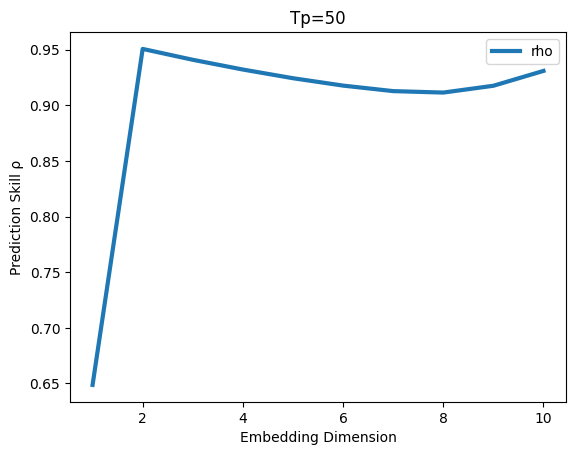

In [4]:
df = pd.DataFrame({"x_t": x_t, "x_t_tau": x_t_tau})
embedding = pyEDM.EmbedDimension(
    dataFrame=df,
    columns="x_t",
    target="x_t",
    lib="1 800",
    pred="801 1000",
    Tp=50,
    tau=-10,
    maxE=10,
    noTime=True,
)

In [5]:
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0


X0 = np.array([0.1, 0.0, 0.0])
dt = 0.01
t_max = 100

t, X = generate.lorenz(sigma, rho, beta, X0, dt, t_max)

layout = go.Layout(
    title="Lorenz Attractor",
    scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
    width=600,
    height=600,
)
data = [go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode="lines")]

fig = go.Figure(data=data, layout=layout)
fig.show()

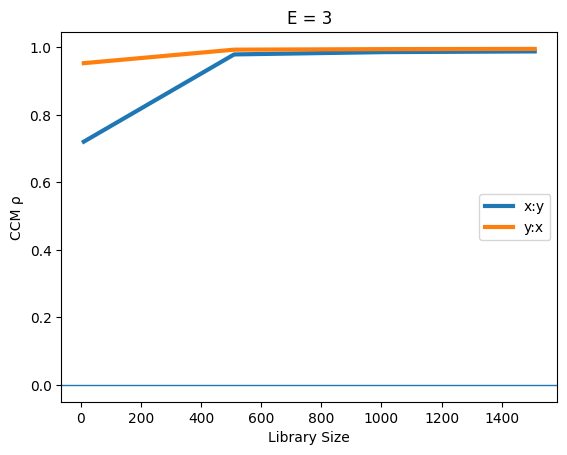

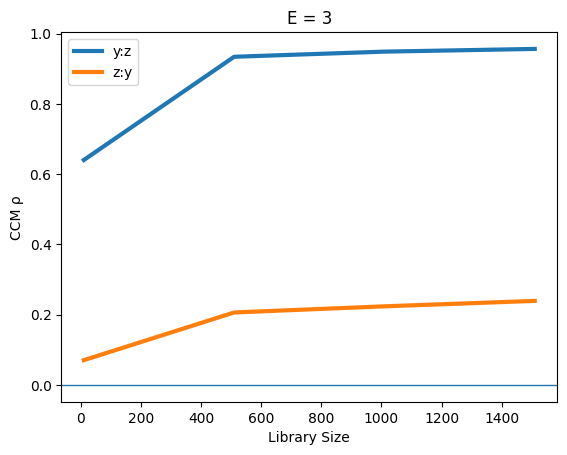

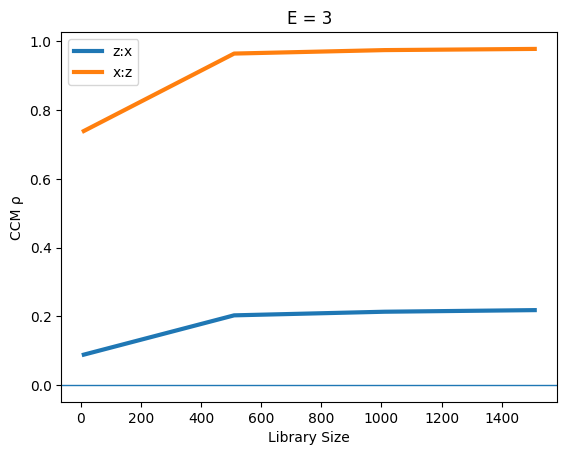

In [10]:
tau = 2
df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "z": X[:, 2]})

for a, b in [("x", "y"), ("y", "z"), ("z", "x")]:
    pyEDM.CCM(
        dataFrame=df,
        E=3,
        columns=a,
        target=b,
        libSizes=[10, 2000, 500],  # type: ignore
        sample=10,
        tau=tau,
        Tp=13,
        showPlot=True,
    )

In [7]:
layout = go.Layout(
    title="Lagged Embedding",
    width=600,
    height=600,
)
data = go.Scatter(x=X[::3, 0][:-4], y=X[::3, 0][4:], mode="lines")

fig = go.Figure(data=data, layout=layout)
fig.show()